# MAC0460: Exercício Programa 2

**Aluna**: Julia Leite da Silva

**NUSP**: 11221797

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

In [2]:
# carregando os dados
df = pd.read_csv("pokemon.csv")

# Análise dos Dados

In [3]:
df.shape

(801, 41)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
against_bug,801.0,9.962547e-01,0.597248,0.25,0.5,1.0,1.0,4.0
against_dark,801.0,1.057116e+00,0.438142,0.25,1.0,1.0,1.0,4.0
against_dragon,801.0,9.687890e-01,0.353058,0.00,1.0,1.0,1.0,2.0
against_electric,801.0,1.073970e+00,0.654962,0.00,0.5,1.0,1.0,4.0
against_fairy,801.0,1.068976e+00,0.522167,0.25,1.0,1.0,1.0,4.0
against_fight,801.0,1.065543e+00,0.717251,0.00,0.5,1.0,1.0,4.0
against_fire,801.0,1.135456e+00,0.691853,0.25,0.5,1.0,2.0,4.0
against_flying,801.0,1.192884e+00,0.604488,0.25,1.0,1.0,1.0,4.0
against_ghost,801.0,9.850187e-01,0.558256,0.00,1.0,1.0,1.0,4.0
against_grass,801.0,1.034020e+00,0.788896,0.25,0.5,1.0,1.0,4.0


In [6]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [9]:
(df.isna().sum()/df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
type2,47.940075
percentage_male,12.234707
weight_kg,2.496879
height_m,2.496879
name,0.000000
capture_rate,0.000000
classfication,0.000000
defense,0.000000
experience_growth,0.000000
hp,0.000000


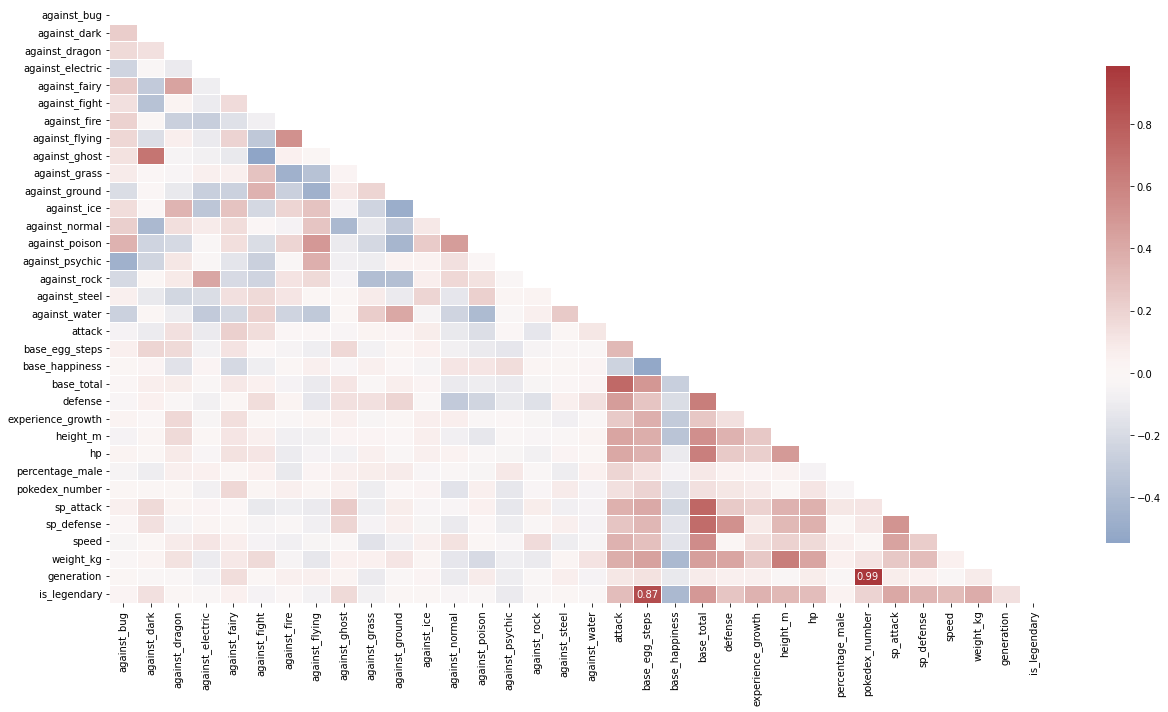

In [10]:
df_corr = df.corr(method="pearson")

labels = np.where(
    np.abs(df_corr) >= 0.75, np.round(df_corr[np.abs(df_corr) > 0.75], 2), ""
)

# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(18, 10))

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

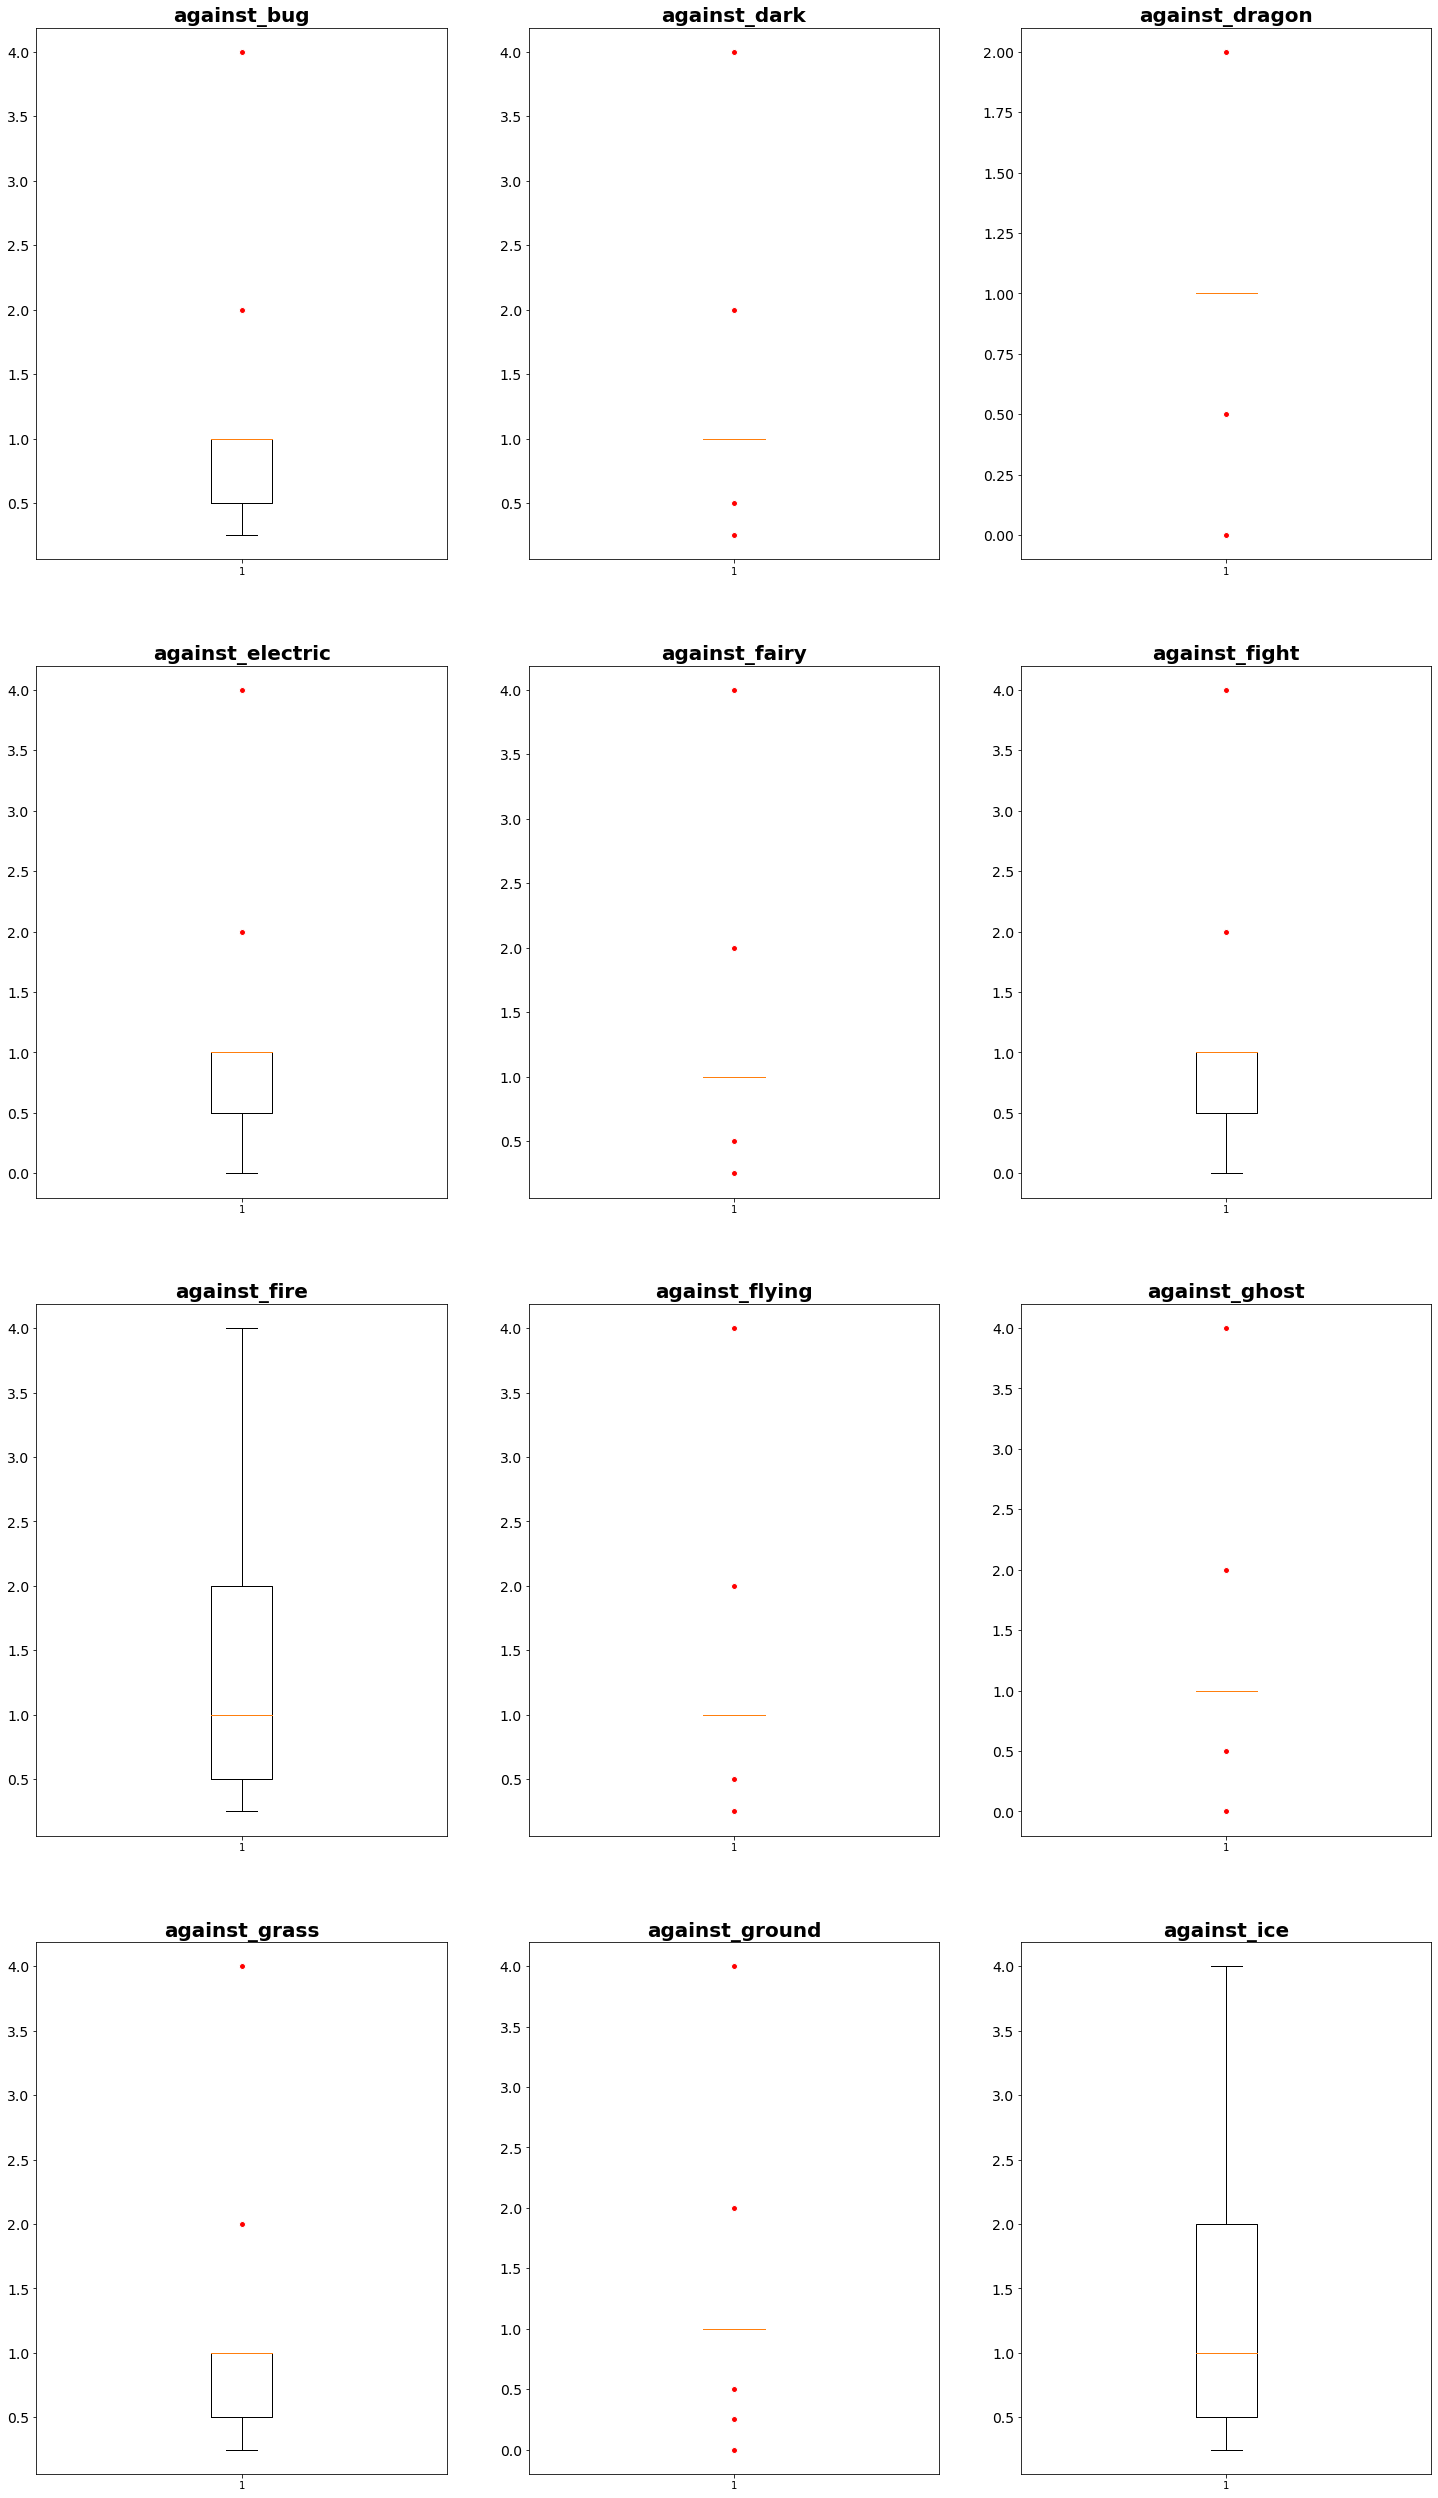

In [11]:
#Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include=['float64','int64']).columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(4, 3, figsize=(25,45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:,i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)

# Preparação dos Dados

Aqui vamos eliminar as colunas que devem ser descartadas segundo o enunciado e preparar os dados

In [12]:
dropped=['abilities', 'against_bug', 'against_dark', 'against_dragon',
        'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water','japanese_name', 'name']

df=df.drop(dropped, axis=1)

In [13]:
# como queremos um classificador binário, vamos deixar apenas os pokemons com type 'water' e 'normal'
df = df[df['type1'].isin(['water', 'normal'])]

In [14]:
df['type1'] = df['type1'].replace({'water':1, 'normal':0})

In [16]:
df.head()

,against_electric,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
6,2.0,48,5120,70,314,45,Tiny Turtle Pokémon,65,1059860,0.5,...,88.1,7,50,64,43,1,NaN,9.0,1,0
7,2.0,63,5120,70,405,45,Turtle Pokémon,80,1059860,1.0,...,88.1,8,65,80,58,1,NaN,22.5,1,0
8,2.0,103,5120,70,630,45,Shellfish Pokémon,120,1059860,1.6,...,88.1,9,135,115,78,1,NaN,85.5,1,0
15,2.0,45,3840,70,251,255,Tiny Bird Pokémon,40,1059860,0.3,...,50.0,16,35,35,56,0,flying,1.8,1,0
16,2.0,60,3840,70,349,120,Bird Pokémon,55,1059860,1.1,...,50.0,17,50,50,71,0,flying,30.0,1,0
